<a href="https://colab.research.google.com/github/ananyak091/Zomato_Data_Analysis_/blob/main/Zomato_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [61]:
df = pd.read_csv('Zomato-data-.csv')

In [62]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [63]:
def handleRating(value):
    value = str(value).split('/')[0].strip()   # take first part & remove spaces
    try:
        return float(value)
    except:
        return None   # return NaN if conversion fails

df['rate'] = df['rate'].apply(handleRating)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [64]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [65]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9,47,200,Dining


In [66]:
df.shape

(148, 7)

In [67]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [69]:
df.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


**1. General Insights**

How many restaurants are there in total?

In [70]:
print(df['name'].nunique())

145


In [71]:
df['name'].value_counts()

,count
name,
San Churro Cafe,2
Onesta,2
CAFE NOVA,2
Addhuri Udupi Bhojana,1
Jalsa,1
...,...
Melting Melodies,1
New Indraprasta,1
Anna Kuteera,1


How many restaurants support online ordering vs. those that don’t?

In [72]:
counts = df['online_order'].value_counts().reset_index() #to convert series to data frame as value_count() return series
counts.columns = ['online_order', 'count'] #to rename the column with this
fig = px.pie(counts, values='count', names='online_order', title='Online Order Distribution')
fig.show()

How many restaurants support table booking?

In [73]:
counts=df['book_table'].value_counts().reset_index()
counts.columns=['book_table','count']
fig=px.pie(counts,values='count',names='book_table',title='Book Table Distribution')
fig.show()

Exploring Restaurant Types


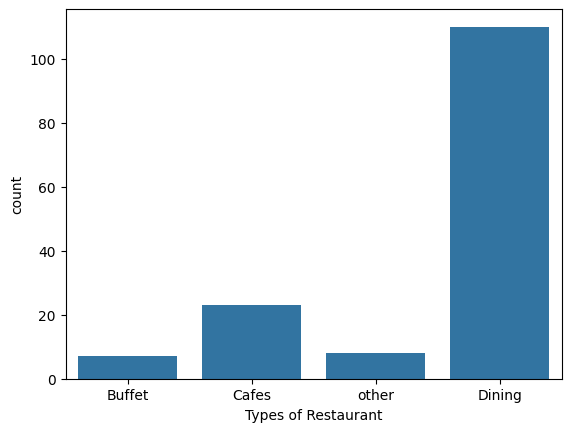

In [74]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Restaurant")
plt.show()

***2. Ratings & Customer Satisfaction***

What is the distribution of ratings among restaurants?(Do most restaurants have good or average ratings?)

In [75]:
fig = px.histogram(df, x='rate', nbins=5, histnorm='percent',
                   title='Distribution of Ratings')
fig.show()

Does online ordering impact ratings?

In [76]:
fig = px.box(df, x='online_order', y='rate', title='Online Ordering and Ratings')
fig.show()

Do restaurants with table booking facilities have better ratings than those without?

In [77]:
fig = px.violin(df, y='rate', x='book_table', title='Table Booking and Ratings')
fig.show()

***3. Popularity (Votes Analysis)***

Which restaurant has the highest votes and rating?

In [78]:
highest_rating = df.loc[df['rate'].idxmax()]
highest_votes = df.loc[df['votes'].idxmax()]
print("Restaurant Name with Highest Rating:", highest_rating['name'])
print("\n Full Details\n", highest_rating)
print("\nRestaurant Name with Highest Votes:", highest_votes['name'])
print("\n Full Details\n", highest_votes)

Restaurant Name with Highest Rating: Onesta

 Full Details
 name                           Onesta
online_order                      Yes
book_table                        Yes
rate                              4.6
votes                            2556
approx_cost(for two people)       600
listed_in(type)                 Cafes
Name: 7, dtype: object

Restaurant Name with Highest Votes: Empire Restaurant

 Full Details
 name                           Empire Restaurant
online_order                                 Yes
book_table                                    No
rate                                         4.4
votes                                       4884
approx_cost(for two people)                  750
listed_in(type)                            other
Name: 38, dtype: object


Is there a correlation between votes and ratings? (Do more votes mean better ratings?)

In [79]:
fig= px.scatter(df,x='votes',y='rate',title='Votes vs Ratings')
fig.show()
correlation = df['votes'].corr(df['rate'])
print("Correlation between Votes and Ratings:", correlation)

Correlation between Votes and Ratings: 0.48984428790988815


***4. Cost & Affordability Analysis***

What is the average cost for two across restaurants?


In [80]:
avg_cost = df['approx_cost(for two people)'].mean()
print("Average Cost for Two People Across Restaurants:", avg_cost)

Average Cost for Two People Across Restaurants: 418.2432432432432


What is the most common cost category for two people (i.e., which price point has the maximum number of restaurants)?

Most Common Cost Category for Two People: 300


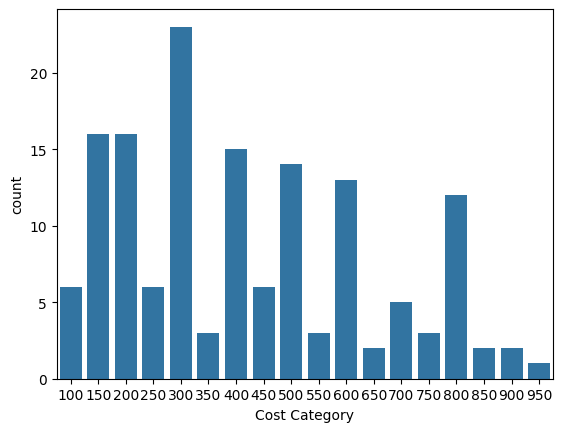

In [81]:
majority_cost = df['approx_cost(for two people)'].mode()[0]
print("Most Common Cost Category for Two People:", majority_cost)
sns.countplot(x=df['approx_cost(for two people)'])
plt.xlabel("Cost Category")
plt.show()

Which type of restaurants (listed_in(type)) are the most expensive vs. affordable?

In [82]:
avg_cost_by_type = df.groupby('listed_in(type)')['approx_cost(for two people)'].mean().reset_index()
avg_cost_by_type = avg_cost_by_type.sort_values(by='approx_cost(for two people)', ascending=False)
print(avg_cost_by_type)
print("\nMost Expensive:", avg_cost_by_type.iloc[0]['listed_in(type)'])
print("Most Affordable:", avg_cost_by_type.iloc[-1]['listed_in(type)'])

px.bar(avg_cost_by_type, x='listed_in(type)', y='approx_cost(for two people)',
       title='Average Cost by Restaurant Type')

  listed_in(type)  approx_cost(for two people)
0          Buffet                   671.428571
3           other                   668.750000
1           Cafes                   545.652174
2          Dining                   357.272727

Most Expensive: Buffet
Most Affordable: Dining


Is there a relationship between cost and ratings? (Do expensive restaurants always get higher ratings?)

In [83]:
fig = px.scatter(df, x='approx_cost(for two people)', y='rate',
                 title='Cost vs Ratings')
fig.show()

correlation = df['approx_cost(for two people)'].corr(df['rate'])
print("Correlation between Cost and Ratings:", correlation)

Correlation between Cost and Ratings: 0.27521574616074335


***5. Business Strategy Insights***

Which factors (online order, table booking, cost, type) most strongly influence customer ratings and votes?

In [84]:
print(df[['approx_cost(for two people)','rate','votes']].corr())


                             approx_cost(for two people)      rate     votes
approx_cost(for two people)                     1.000000  0.275216  0.324372
rate                                            0.275216  1.000000  0.489844
votes                                           0.324372  0.489844  1.000000


                  rate       votes
online_order                      
No            3.487778   75.222222
Yes           3.858621  559.000000
                rate       votes
book_table                      
No          3.601429  226.185714
Yes         4.187500  940.750000


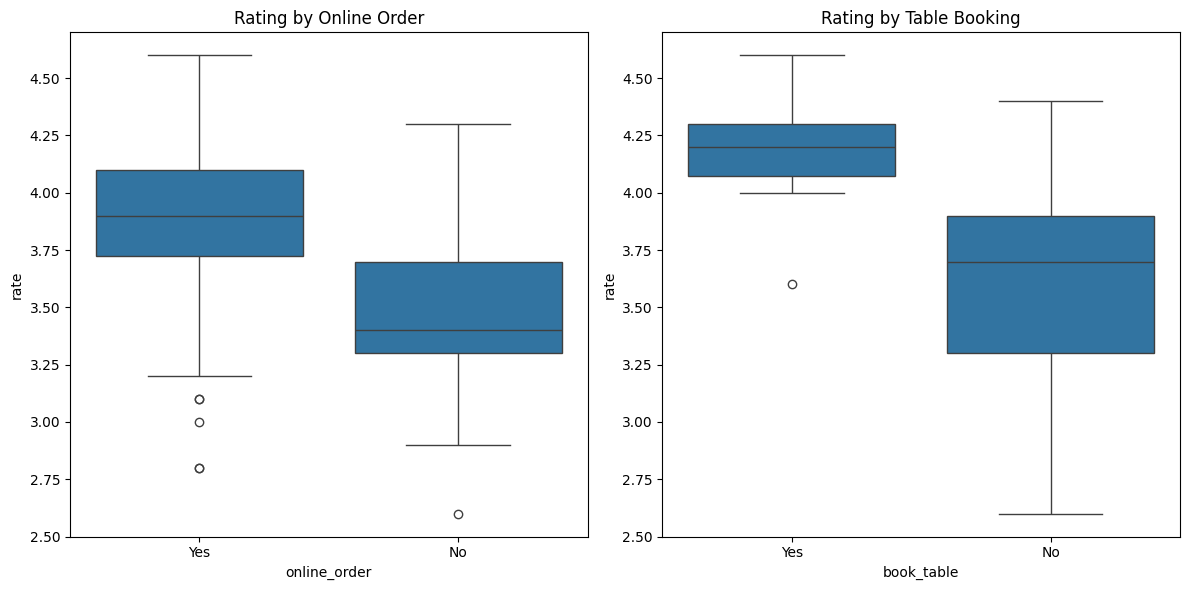

In [85]:
print(df.groupby('online_order')[['rate','votes']].mean())
print(df.groupby('book_table')[['rate','votes']].mean())

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='online_order', y='rate', data=df, ax=axes[0])
axes[0].set_title("Rating by Online Order")

sns.boxplot(x='book_table', y='rate', data=df, ax=axes[1])
axes[1].set_title("Rating by Table Booking")

plt.tight_layout()
plt.show()



                     rate        votes
listed_in(type)                       
Buffet           3.842857   432.571429
Cafes            3.765217   279.739130
Dining           3.571818   185.118182
other            3.912500  1170.875000


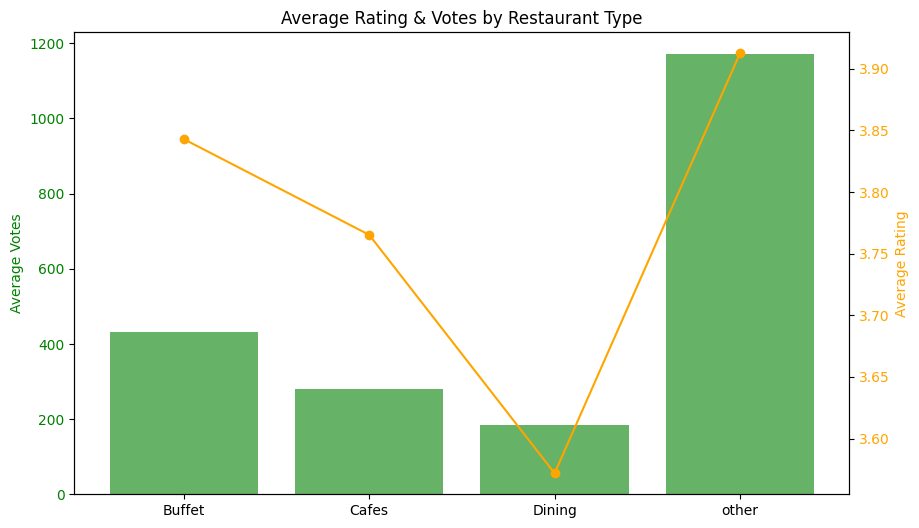

In [86]:
print(df.groupby('listed_in(type)')[['rate','votes']].mean())
avg_type = df.groupby('listed_in(type)')[['rate','votes']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(10,6))

# Bar for votes
ax1.bar(avg_type['listed_in(type)'], avg_type['votes'], color='green', alpha=0.6, label='Votes')
ax1.set_ylabel('Average Votes', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Second axis for ratings
ax2 = ax1.twinx()
ax2.plot(avg_type['listed_in(type)'], avg_type['rate'], color='orange', marker='o', label='Rating')
ax2.set_ylabel('Average Rating', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("Average Rating & Votes by Restaurant Type")
plt.xticks(rotation=45)
plt.show()



Order Mode Preferences by Restaurant Type


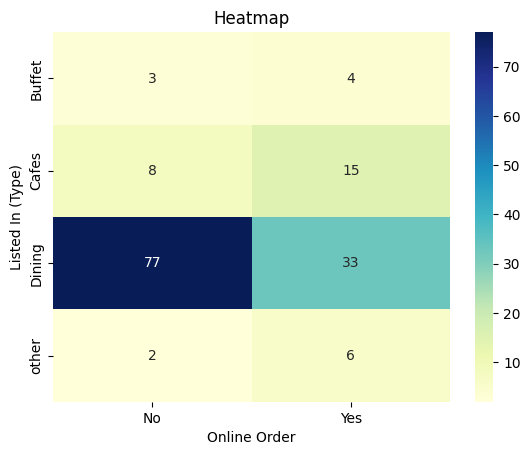

In [87]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()